<a href="https://colab.research.google.com/github/taylan-sen/CIS490b_computer_vision/blob/main/Keras_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Keras



# datapoints we have is: 100
# dimensions for each data point is: 2


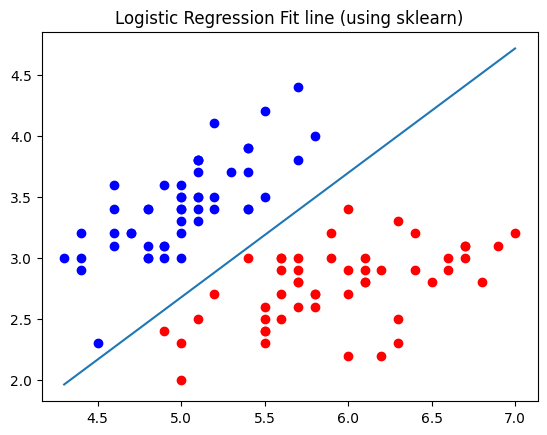

In [ ]:
# Logistic Regression (using sklearn)
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, neighbors, datasets

data = datasets.load_iris()
X = data.data[:,0:2]  # just take the first two input dimensions
y = data.target

# take only first two classes, y=0, y=1
Xsub = X[y!=2,:]
ysub = y[y!=2]
print('# datapoints we have is:', Xsub.shape[0])
print('# dimensions for each data point is:', Xsub.shape[1])

# Fit LogisticRegression using sklearn
model = linear_model.LogisticRegression()
model.fit(Xsub,ysub)

# plot the fit line for LogisticRegression
x = np.linspace(min(Xsub[:,0]),max(Xsub[:,0]), 100)
y = -(model.intercept_ + model.coef_[0][0]*x)/model.coef_[0][1]
plt.plot(x,y)
plt.scatter(Xsub[ysub==0,0], Xsub[ysub==0,1], color='b')
plt.scatter(Xsub[ysub==1,0], Xsub[ysub==1,1], color='r')
plt.title('Logistic Regression Fit line (using sklearn)')
plt.show()

### Neuron

A neural network is made up of a network of neurons. (Neurons are also called *nodes* or *units*.) There are many different types of neurons, but the most common type is described here. A neuron receives a number of inputs.

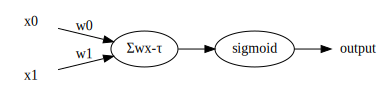

In [ ]:
# @title
# create graph
from graphviz import Source
Source('digraph  { rankdir=LR; x0 [shape=none]; x1 [shape=none]; x0-> "Σwx-τ"[label="w0"]; x1-> "Σwx-τ"[label="w1"]; "Σwx-τ"-> sigmoid -> output;output [shape=none]}')

In [ ]:
# Implement LogisticRegression as a neural network using keras
from keras.layers import Dense
from keras.models import Sequential

model = Sequential()

# Add a single layer with a single neuron
model.add(Dense(units=1, input_shape=(2,), activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['acc'])
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(Xsub, ysub, epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6147 - acc: 0.8300
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6133 - acc: 0.6700
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6095 - acc: 0.8400
Epoch 4/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6080 - acc: 0.6700
Epoch 5/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6041 - acc: 0.9500
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6020 - acc: 0.9600
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6014 - acc: 0.8800
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6035 - acc: 0.6400
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6006 - acc: 0.6200
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5938 - acc: 0.9800
Epoch 11/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5926 

In [ ]:
for layer in model.layers:
  print(layer.get_weights())

[array([[ 0.5704397],
       [-0.9738602]], dtype=float32), array([0.03786845], dtype=float32)]


In [ ]:
[w0,w1],intercept = layer.get_weights()

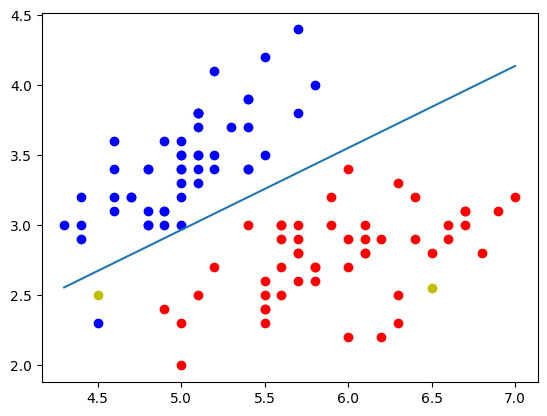

In [ ]:
plt.scatter(Xsub[ysub==0,0], Xsub[ysub==0,1], color='b')
plt.scatter(Xsub[ysub==1,0], Xsub[ysub==1,1], color='r')
plt.scatter(test_point[:,0], test_point[:,1], color='y')
x = np.linspace(min(Xsub[:,0]), max(Xsub[:,0]))
y = (x*w0 +intercept)/(-w1)
plt.plot(x,y)
plt.show()